In [27]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [8]:
data = pd.read_csv('insurance2.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1338 non-null   int64  
 1   sex             1338 non-null   int64  
 2   bmi             1338 non-null   float64
 3   children        1338 non-null   int64  
 4   smoker          1338 non-null   int64  
 5   region          1338 non-null   int64  
 6   charges         1338 non-null   float64
 7   insuranceclaim  1338 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 83.8 KB


In [6]:
data.shape

(1338, 8)

                     age       sex       bmi  children    smoker    region  \
age             1.000000 -0.020856  0.109272  0.042469 -0.025019  0.002127   
sex            -0.020856  1.000000  0.046371  0.017163  0.076185  0.004588   
bmi             0.109272  0.046371  1.000000  0.012759  0.003750  0.157566   
children        0.042469  0.017163  0.012759  1.000000  0.007673  0.016569   
smoker         -0.025019  0.076185  0.003750  0.007673  1.000000 -0.002181   
region          0.002127  0.004588  0.157566  0.016569 -0.002181  1.000000   
charges         0.299008  0.057292  0.198341  0.067998  0.787251 -0.006208   
insuranceclaim  0.113723  0.031565  0.384198 -0.409526  0.333261  0.020891   

                 charges  insuranceclaim  
age             0.299008        0.113723  
sex             0.057292        0.031565  
bmi             0.198341        0.384198  
children        0.067998       -0.409526  
smoker          0.787251        0.333261  
region         -0.006208        0.02089

<AxesSubplot:>

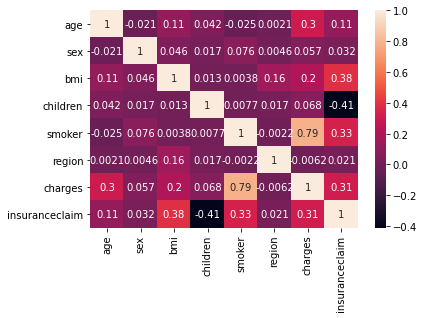

In [15]:
corr = data.corr()
print(corr)
sns.heatmap(corr, annot=True)

In [17]:
dataTrain = data[:1000]
dataTest = data[1000:1300]
dataCheck = data[1300:]

In [18]:
trainLabel = np.asarray(dataTrain['insuranceclaim'])
trainData = np.asarray(dataTrain.drop('insuranceclaim',1))
testLabel = np.asarray(dataTest['insuranceclaim'])
testData = np.asarray(dataTest.drop('insuranceclaim',1))

In [20]:
means = np.mean(trainData, axis=0)
stds = np.std(trainData, axis=0)

trainData = (trainData-means)/stds
testData = (testData-means)/stds

In [24]:
lg = LogisticRegression()

In [25]:
lg.fit(trainData, trainLabel)

LogisticRegression()

In [28]:
accuracy = lg.score(testData, testLabel)
print("accuracy =", accuracy*100,"%")

accuracy = 86.0 %


Text(0.5, 0, 'Importance')

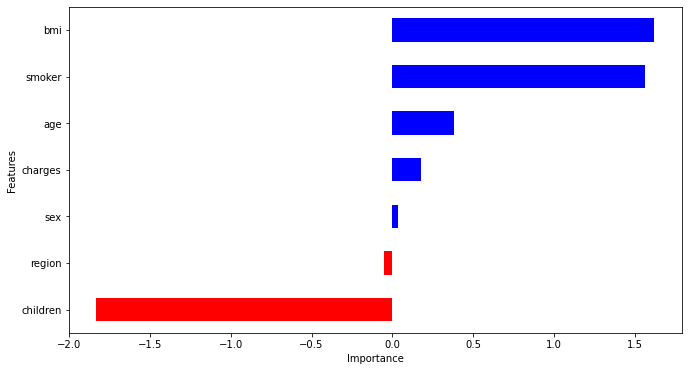

In [29]:
coef = list(lg.coef_[0])
labels = list(dataTrain.drop('insuranceclaim',1).columns)
features = pd.DataFrame()
features['Features'] = labels
features['importance'] = coef
features.sort_values(by=['importance'], ascending=True, inplace=True)
features['positive'] = features['importance'] > 0
features.set_index('Features', inplace=True)
features.importance.plot(kind='barh', figsize=(11, 6),color = features.positive.map({True: 'blue', False: 'red'}))
plt.xlabel('Importance')